In [4]:
%config InlineBackend.rc = {"figure.dpi": 72, "figure.figsize": (6.0, 4.0)}
%matplotlib inline
import itertools

import abtem
import ase
import matplotlib.pyplot as plt
import numpy as np
from abtem.inelastic.plasmons import MonteCarloPlasmons

abtem.config.set({"device": "gpu"})

# Plasmons

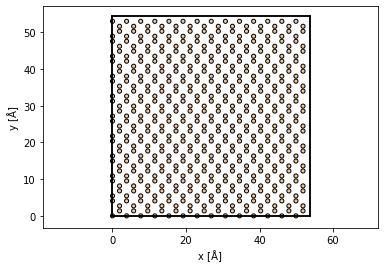

In [67]:
atoms = ase.build.bulk("Si", cubic=True)

atoms = ase.build.surface(atoms, indices=(1, 1, 0), layers=3, periodic=True)

atoms = abtem.orthogonalize_cell(atoms)

atoms *= (7, 10, 10)

abtem.show_atoms(atoms, plane="xy", scale=0.5);

from ase.io import write
write("C:\\Users\\jacob\\Desktop\\silicon.xyz", atoms)

In [68]:
atoms.cell

Cell([53.75425750580134, 54.3, 115.1876946552886])

In [49]:
Cs = 1e-3 * 1e10
defocus = 600

probe = abtem.Probe(
    energy=200e3,
    gpts=(512, 512),
    semiangle_cutoff=3.9,
    taper=0.0,
    Cs=Cs,
    defocus=defocus,
)

frozen_phonons = abtem.FrozenPhonons(atoms, sigmas=0.078, num_configs=10)

potential = abtem.Potential(frozen_phonons, slice_thickness=1.9)

detectors = abtem.PixelatedDetector(max_angle=120)

no_loss = probe.multislice(
    potential, detectors=detectors
).compute()  # .diffraction_patterns(max_angle=20).mean(0).compute()

[########################################] | 100% Completed | 55.74 ss


In [48]:
no_loss.sum()

0.8835587

(<Figure size 1152x360 with 2 Axes>,
 <Axes: xlabel='scattering angle x [mrad]', ylabel='scattering angle y [mrad]'>)

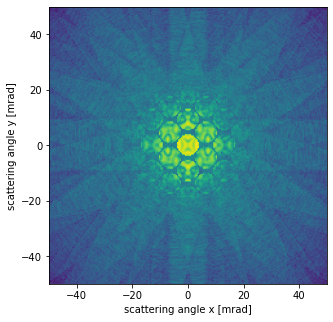

In [61]:
no_loss.crop(50).show(
    explode=True,
    image_grid_kwargs={"axes_pad": 0.05},
    figsize=(16, 5),
    units="mrad",
    power=0.01,
)

In [51]:
from abtem.multislice import FresnelPropagator

plasmons = MonteCarloPlasmons(
    mean_free_path=1050,
    excitation_energy=17,
    critical_angle=27.6,
    num_samples=50,
    num_excitations=[3],
    seed=None,
)

probe_loss = probe.copy()

events = plasmons.draw_events(probe_loss, potential)

# planewave.grid.match(potential)

probe_loss = probe_loss.insert_transform(events)

loss = probe_loss.multislice(potential, detectors=detectors).compute()

# loss.array

[########################################] | 100% Completed | 81.16 ss


In [11]:
loss.axes_metadata[0].values

(((144.34482781318357, 373.5889244081527, 532.7068236766952),
  (1.0456828359480992, 2.4700307563889026, 0.040263400921284435),
  (5.977185751817904, 5.279418549904546, 5.375750485320423),
  0),
 ((319.96349918265867, 450.13950129332284, 514.3975623851958),
  (14.994757770632937, 2.197695809466098, 15.583446172403562),
  (2.226910166606137, 5.93959281142384, 6.007111315497473),
  0),
 ((143.50004580362364, 219.38681382436903, 219.83278516738656),
  (0.05862307834497642, 6.280391047371984, 0.37147425746422935),
  (1.8722935537467102, 3.939803907718991, 2.508490677304538),
  0),
 ((208.47739828162588, 281.68780118982204, 458.047152244743),
  (7.953630271836831, 8.304890442879518, 0.0679487694651775),
  (1.165429499685304, 2.9739148623049103, 3.612879581860878),
  0),
 ((55.375750345057945, 325.75470187186124, 420.0369353046835),
  (0.07826373539232391, 0.359818403178733, 2.5923550617918725),
  (6.171155406426904, 1.5550096371457744, 3.68447057275994),
  0),
 ((11.914167345916287, 134.921

(<Figure size 432x288 with 2 Axes>,
 <Axes: xlabel='scattering angle x [mrad]', ylabel='scattering angle y [mrad]'>)

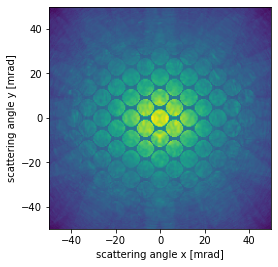

In [59]:
loss.crop(50).mean(0).show(
    explode=True, image_grid_kwargs={"axes_pad": 0.05}, units="mrad", power=0.01
)

In [12]:
exit_waves_loss.diffraction_patterns(max_angle=20).mean(0).show(
    figsize=(18, 5), cmap="gray", power=0.1
)

NameError: name 'exit_waves_loss' is not defined